In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
heart_df = pd.read_csv("../Dataset/heart.csv")

In [3]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heart_df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [11]:
heart_df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


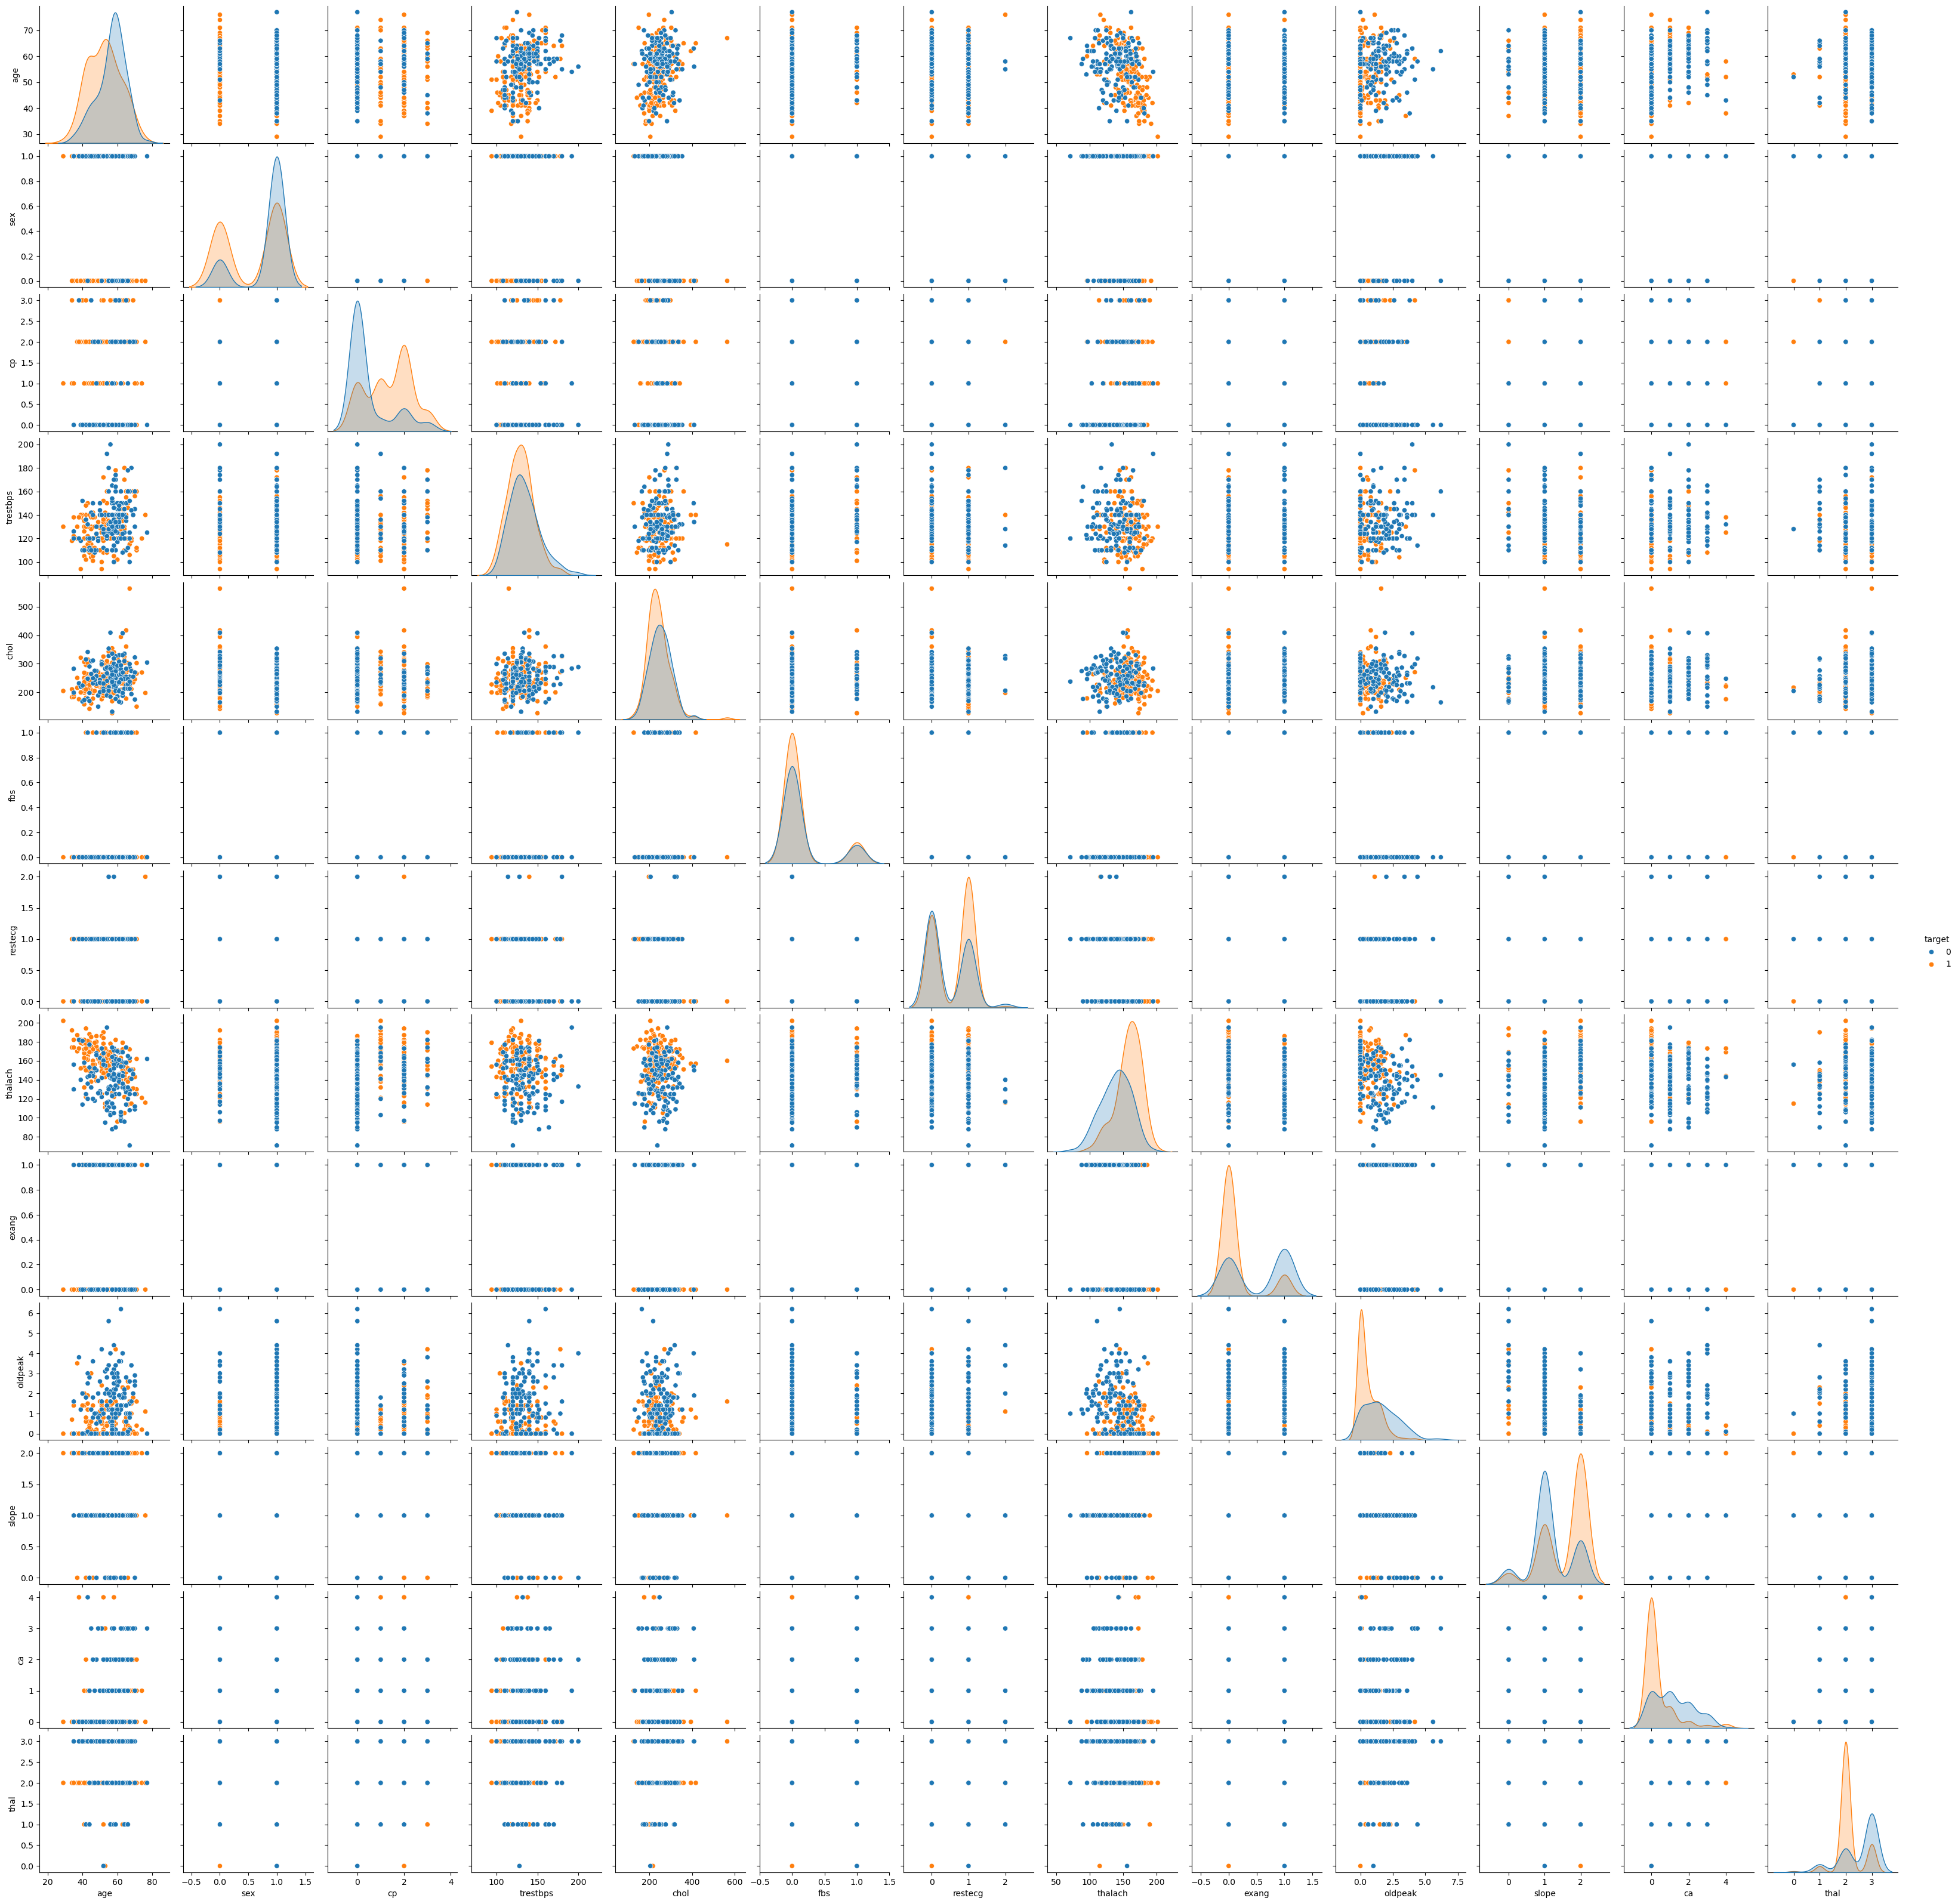

In [13]:
sns.pairplot(heart_df, hue="target")

In [14]:

X = heart_df.drop(columns = 'target' , axis=1)
Y = heart_df['target']


In [15]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
X.shape

(303, 13)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 , stratify=Y, random_state=2)

In [25]:
Y_train.count()

242

In [27]:
Y_train.value_counts()

target
1    132
0    110
Name: count, dtype: int64

In [29]:
print(X.shape, X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


In [31]:
classifier = svm.SVC(kernel='linear')

In [33]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [35]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [37]:
training_data_accuracy

0.8553719008264463

In [39]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
print(input_data_as_numpy_array)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[ 62.    0.    0.  140.  268.    0.    0.  160.    0.    3.6   0.    2.
   2. ]
[[ 62.    0.    0.  140.  268.    0.    0.  160.    0.    3.6   0.    2.
    2. ]]
[0]
The Person does not have a Heart Disease


C:\Users\Romit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [41]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


In [43]:
import pickle

In [45]:
fileName = "../saveModels/Heart.sav"

In [47]:
pickle.dump(classifier, open(fileName, 'wb'))

In [49]:
loaded_model = pickle.load(open(fileName, 'rb'))

In [51]:
input_data = (63,1,3,145,123,1,0,165,0,2.3,0,0,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)


# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


C:\Users\Romit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
